In [39]:
import os
os.chdir('D://scratch_backup//alpine//beri9208//mnc-pt-pyrid//calcs//surfs//')
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
save_dir = 'C://Users//User//PycharmProjects//Musgrave_scripts//BenRich//integrated_charge_density_baresurfs_nobias//'
surf_dirs = [
    "4N//No_bias//", "3N//No_bias//", "2n-cis//No_bias//", "2n-trans//No_bias//", "1n//No_bias//", "0n//No_bias//"
]
surf_names = [
    '4N, No_bias', '3N, No_bias', '2N-cis, No_bias', '2N-trans, No_bias', '1N, No_bias', '0n, No_bias'
]
plane_idcs = [
    98, 0, 98, 0, 0, 0,
]
nplots = len(surf_dirs)

In [40]:
import funcs
Rs = []
Ss = []
mus = []
for d in surf_dirs:
    R, S, mu = funcs.get_output_shape(d + 'out')
    Rs.append(R)
    Ss.append(S)
    mus.append(mu)
d_tots = []
for i, d in enumerate(surf_dirs):
    d_tot = np.fromfile(d + 'd_tot')
    d_tot = np.reshape(d_tot, Ss[i])
    d_tots.append(d_tot)
a_tuples = []
da_tuples = []
for i, d in enumerate(surf_dirs):
    a_tuple, da_tuple = funcs.init_box_xyz_coords(Rs[i], Ss[i])
    a_tuples.append(a_tuple)
    da_tuples.append(da_tuple)
plot_slices = []
for i, d in enumerate(surf_dirs):
    plot_slices.append(np.zeros(np.shape(d_tots[i][:,:,0])))
intg_z_bounds_list = []
for i,d in enumerate(surf_dirs):
    intg_z_bounds_list.append((plane_idcs[i], plane_idcs[i] + int(Ss[i][2]/8)))
for i,d in enumerate(surf_dirs):
    for j in range(intg_z_bounds_list[i][0], intg_z_bounds_list[i][1]):
        plot_slices[i] += d_tots[i][:,:,j]
    plot_slices[i] *= da_tuples[i][2]

In [41]:
# Generate sample data (replace this with your 2D array and associated x/y values)
num_points = 100
xyzs = []
for i, p in enumerate(plot_slices):
    xyzs.append(funcs.conv_to_cartesian(p, Rs[i], Ss[i]))

grid_xys = []
for i, p in enumerate(plot_slices):
    x = xyzs[i][0]
    y = xyzs[i][1]
    grid_xys.append(np.mgrid[min(x):max(x):200j, min(y):max(y):200j])

grid_zs = []
for i, xy in enumerate(grid_xys):
    x = xyzs[i][0]
    y = xyzs[i][1]
    z = xyzs[i][2]
    grid_x = grid_xys[i][0]
    grid_y = grid_xys[i][1]
    grid_zs.append(griddata((x, y), z, (grid_x, grid_y), method='cubic'))

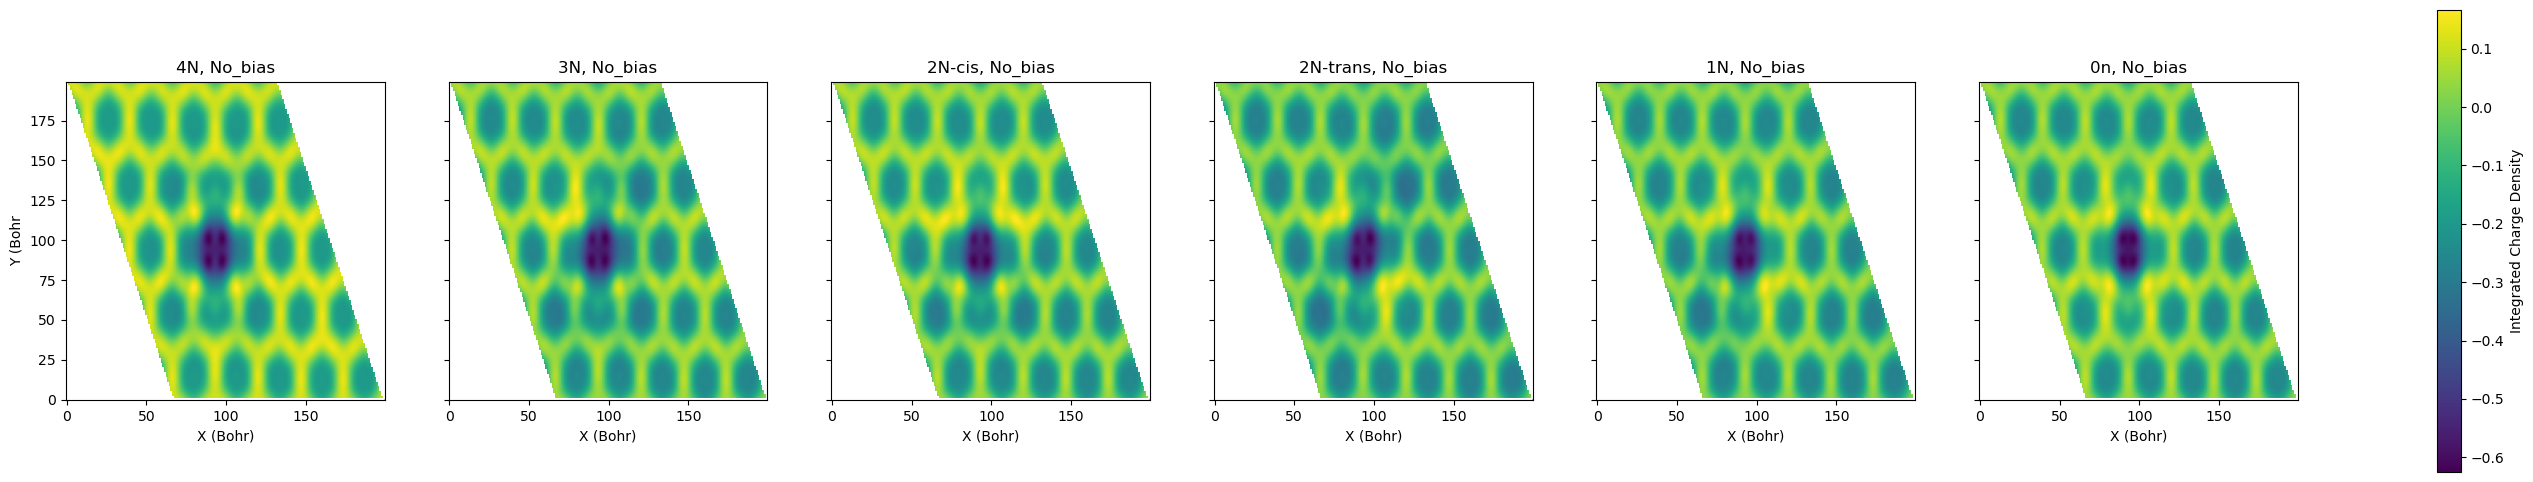

In [43]:
fig, axes = plt.subplots(1, nplots, figsize=(6*nplots, 6), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    c = ax.imshow(grid_zs[i].T, origin='lower', cmap='viridis')
    ax.set_title(surf_names[i])
    ax.set_xlabel('X (Bohr)')
axes[0].set_ylabel('Y (Bohr')
#fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.1, hspace=0.1)
fig.colorbar(c, ax=axes.ravel().tolist(), label='Integrated Charge Density')
plt.savefig(save_dir + 'multiple_1byn_nb.png')
plt.show()